# 
#A.Churn.Csv

#In this dataset you have to predict that customer is exited or not based on various factors given in dataset.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df= pd.read_csv("Churn_Modelling.csv")

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [65]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Gender'])

LabelEncoder()

In [69]:
df['Gender'] = encoder.transform(df['Gender'])

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Geography'])
df['Geography'] = encoder.transform(df['Geography'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [72]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [73]:
df.drop(['CreditScore', 'Geography', 'Tenure', 'NumOfProducts', 'HasCrCard' ,'EstimatedSalary'],axis=1, inplace=True)

In [74]:
df.head()

,Gender,Age,Balance,IsActiveMember,Exited
0,0,42,0.00,1,1
1,0,41,83807.86,1,0
2,0,42,159660.80,0,1
3,0,39,0.00,0,0
4,0,43,125510.82,1,0


In [75]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [76]:
df_majority = df[df['Exited']==0]
df_majority

,Gender,Age,Balance,IsActiveMember,Exited
1,0,41,83807.86,1,0
3,0,39,0.00,0,0
4,0,43,125510.82,1,0
6,1,50,0.00,1,0
8,1,44,142051.07,1,0
...,...,...,...,...,...
9993,1,28,155060.41,0,0
9994,0,29,0.00,0,0
9995,1,39,0.00,0,0
9996,1,35,57369.61,1,0


In [77]:
df_minority = df[df['Exited']==1]
df_minority 

,Gender,Age,Balance,IsActiveMember,Exited
0,0,42,0.00,1,1
2,0,42,159660.80,0,1
5,1,44,113755.78,0,1
7,0,29,115046.74,0,1
16,1,58,132602.88,0,1
...,...,...,...,...,...
9981,1,42,152039.70,1,1
9982,0,46,137145.12,0,1
9991,0,53,88381.21,0,1
9997,0,36,0.00,1,1


In [78]:
from sklearn.utils import resample
df_up_sampled = resample(df_minority, n_samples=7963 , random_state=123456)
df_up_sampled

,Gender,Age,Balance,IsActiveMember,Exited
306,1,43,0.00,1,1
3543,1,49,135133.39,1,1
2362,1,45,122917.71,1,1
5125,1,54,105770.14,1,1
7724,1,44,141252.18,1,1
...,...,...,...,...,...
1405,0,44,128747.69,0,1
5535,0,32,157138.99,0,1
4373,0,45,0.00,0,1
1454,0,34,70731.07,1,1


In [79]:
df=pd.concat([df_up_sampled, df_majority])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 306 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          15926 non-null  int64  
 1   Age             15926 non-null  int64  
 2   Balance         15926 non-null  float64
 3   IsActiveMember  15926 non-null  int64  
 4   Exited          15926 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 746.5 KB


In [81]:
df['Exited'].value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [82]:
df.head()

,Gender,Age,Balance,IsActiveMember,Exited
306,1,43,0.00,1,1
3543,1,49,135133.39,1,1
2362,1,45,122917.71,1,1
5125,1,54,105770.14,1,1
7724,1,44,141252.18,1,1


<Axes: >

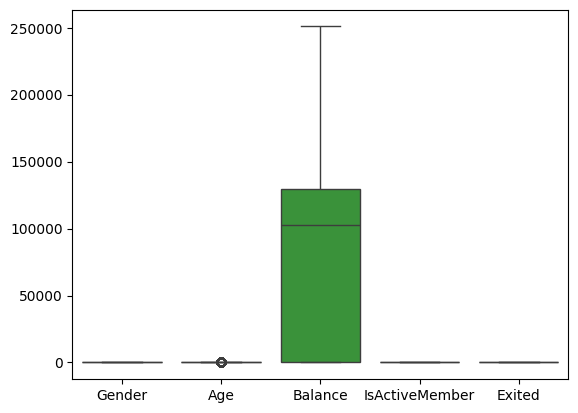

In [83]:
sns.boxplot(df)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 306 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          15926 non-null  int64  
 1   Age             15926 non-null  int64  
 2   Balance         15926 non-null  float64
 3   IsActiveMember  15926 non-null  int64  
 4   Exited          15926 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 746.5 KB


In [106]:
array_scaled=scaler.transform(df)

In [107]:
array_scaled

array([[ 0.99199487,  0.17685163, -1.34381853,  1.09227275,  1.        ],
       [ 0.99199487,  0.7413449 ,  0.86218534,  1.09227275,  1.        ],
       [ 0.99199487,  0.36501605,  0.66276877,  1.09227275,  1.        ],
       ...,
       [ 0.99199487, -0.19947721, -1.34381853, -0.91552224, -1.        ],
       [ 0.99199487, -0.57580605, -0.40728033,  1.09227275, -1.        ],
       [-1.00806973, -1.23438152,  0.7807156 , -0.91552224, -1.        ]])

<Axes: >

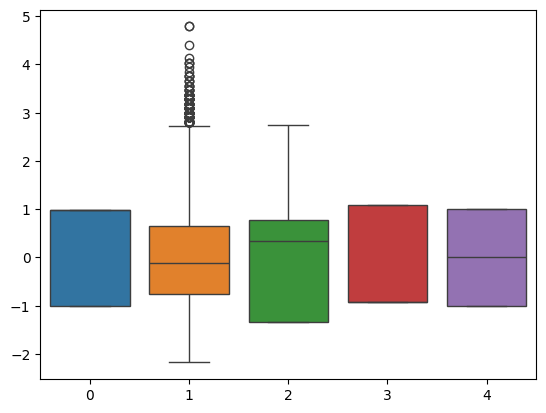

In [108]:
sns.boxplot(array_scaled)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 306 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          15926 non-null  int64  
 1   Age             15926 non-null  int64  
 2   Balance         15926 non-null  float64
 3   IsActiveMember  15926 non-null  int64  
 4   Exited          15926 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 746.5 KB


CreditScore	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited

In [111]:
df_scaled= pd.DataFrame(array_scaled,columns=['Gender', 'Age' , 'Balance', 'IsActiveMember', 'Exited'])

<Axes: >

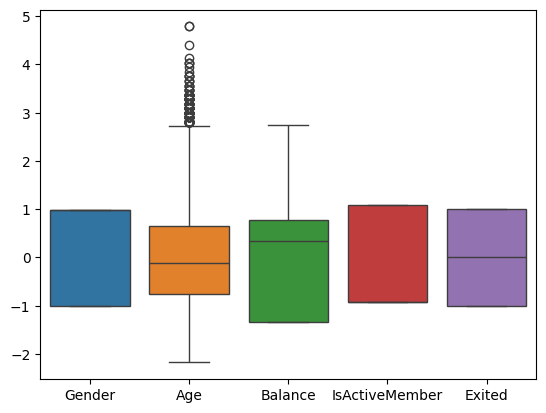

In [113]:
sns.boxplot(df_scaled)

In [114]:
df.corr()

,Gender,Age,Balance,IsActiveMember,Exited
Gender,1.000000,-0.043140,0.010698,0.031977,-0.137013
Age,-0.043140,1.000000,0.052297,0.016532,0.349220
Balance,0.010698,0.052297,1.000000,-0.032995,0.156278
IsActiveMember,0.031977,0.016532,-0.032995,1.000000,-0.197930
Exited,-0.137013,0.349220,0.156278,-0.197930,1.000000


In [116]:
x = df_scaled.drop(['Exited'], axis=1)

y = df_scaled['Exited']

In [117]:
x

,Gender,Age,Balance,IsActiveMember
0,0.991995,0.176852,-1.343819,1.092273
1,0.991995,0.741345,0.862185,1.092273
2,0.991995,0.365016,0.662769,1.092273
3,0.991995,1.211756,0.382841,1.092273
4,0.991995,0.270934,0.962072,1.092273
...,...,...,...,...
15921,0.991995,-1.234382,1.187487,-0.915522
15922,-1.008070,-1.140299,-1.343819,-0.915522
15923,0.991995,-0.199477,-1.343819,-0.915522
15924,0.991995,-0.575806,-0.407280,1.092273


In [118]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15921   -1.0
15922   -1.0
15923   -1.0
15924   -1.0
15925   -1.0
Name: Exited, Length: 15926, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.7, random_state=123456)